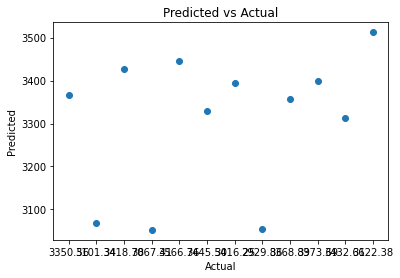

Predicted price for new data: 3120.3842386486704
Predicted price for new data: 3120.3842386486704


In [16]:
import requests
import time
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    
coinmarket_key = '4cd46783-7c2c-4d25-96bc-b1793a2e899e'
url =  'https://pro-api.coinmarketcap.com/v2/cryptocurrency/quotes/historical'


headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': coinmarket_key,
}
# get today's date
today = datetime.now()
parameters = {
  'id': '1027',
  'convert': 'USD',
  'time_start': today - timedelta(days=30),
  'time_end': today,
  'interval': 'daily',
  'count': '1',
}

#class CurrenctyPredictor:
"""  def __init__(self):
     self.data = None
     self.crypto_data = None """

def get_coinmarketcap(url, headers, parameters):
      response = requests.get(url, headers=headers, params=parameters)
      data = response.json()
      return data
      
  
def extract_crypto_data(data):
  crypto_data = []
  for item in data['data']['quotes']:
    timestamp = item['timestamp']
    price = item['quote']['USD']['price']
    volume_24h = item['quote']['USD']['volume_24h']
    data_point = {"timestamp": timestamp, "price": price, "volume_24h": volume_24h}
    crypto_data.append(data_point)
  return crypto_data     
        
def process_crypto_data(crypto_data):
  test_data = pd.DataFrame(crypto_data)  # Create DataFrame
  test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], utc=True)  # Convert timestamp to datetime
  test_data['timestamp'] = test_data['timestamp'].dt.date  # Extract date from datetime
  test_data['volume_24h'] = test_data['volume_24h'].apply(lambda x: f"{x:.2f}")  # Format volume_24h with 2 decimals
  test_data = test_data.rename(columns={'timestamp': 'date'})  # Rename timestamp column
  test_data['price'] = test_data['price'].apply(lambda x: f"{x:.2f}")  # Format price with 2 decimals
  test_data['shifted_price'] = test_data.price.shift(-1)  # Shift price one row down (using attribute access)
  test_data_na = test_data.dropna()
  return test_data, test_data_na



def prepare_and_train_linear_regression(test_data_na):
  # Separate features and target variable
  X = test_data_na[['price', 'volume_24h']]  # Select features
  y = test_data_na['shifted_price']  # Target variable

  # Drop the first row (no corresponding target value)
  X = X.iloc[1:]
  y = y.iloc[1:]

  # Split data into training and testing sets (optional, can adjust test_size)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  # Train the model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Make predictions on the testing set
  y_pred = model.predict(X_test)

  return y_test, y_pred, model

def predict_for_latest_data(test_data, model):
 
  latest_values = test_data.iloc[-1, [1, 2]].to_list()

  # Define column names
  column_names = ['price', 'volume_24h']

  # Create a new DataFrame from the latest data point
  new_data = pd.DataFrame([latest_values], columns=column_names)

  # Predict the price for the new data point
  predicted_price = model.predict(new_data)[0]  # Access the first element of prediction


  return predicted_price

def plot_predictions(y_test, y_pred):
  
  plt.scatter(y_test, y_pred)
  plt.title('Predicted vs Actual')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()


crypto_data = extract_crypto_data(data)
test_data, test_data_na = process_crypto_data(crypto_data)
y_test, y_pred, model = prepare_and_train_linear_regression(test_data_na)
plot_predictions(y_test, y_pred)
predicted_price = predict_for_latest_data(test_data, model)
print(f"Predicted price for new data: {predicted_price}")



In [13]:


# Sample data (replace with your actual data)
 
# Extract data (assuming there's only one element in the 'ETH' list)
#crypto_data = data['data']['ETH'][0]['quotes'][0]['quote']['USD']
"""
crypto_data = []
#for item in data['data']['ETH']['quotes']:
#  crypto_data.append(item['quote']['USD'])
for item in data['data']['quotes']:
  #for quote in item['quotes']:
    # Extract desired data from the 'quote' dictionary
    timestamp = item['timestamp']
    price = item['quote']['USD']['price']
    volume_24h = item['quote']['USD']['volume_24h']
    data_point = {"timestamp": timestamp, "price": price, "volume_24h": volume_24h}
    
    # Append the data dictionary to the 'crypto_data' list
    crypto_data.append(data_point)
"""
def extract_crypto_data(data):    
  crypto_data = []
  for item in data['data']['quotes']:
    timestamp = item['timestamp']
    price = item['quote']['USD']['price']
    volume_24h = item['quote']['USD']['volume_24h']
    data_point = {"timestamp": timestamp, "price": price, "volume_24h": volume_24h}
    crypto_data.append(data_point)
  return crypto_data


# Prepare data for CSV row
#row_data = [crypto_data['timestamp'], crypto_data['price'], crypto_data['volume_24h']]
"""
csv_headers = ["date", "price", "volume_24h"]
# Write data to CSV file
with open("crypto_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(csv_headers)  # Write header row
  for row in crypto_data:
    writer.writerow([row['timestamp'], row['price'], row['volume_24h']])
"""


crypto_data = extract_crypto_data(data)
test_data, test_data_na = process_crypto_data(crypto_data)
y_test, y_pred, model = prepare_and_train_linear_regression(test_data_na)
plot_predictions(y_test, y_pred)
predicted_price = predict_for_latest_data(test_data, model)
print(f"Predicted price for new data: {predicted_price}")

TypeError: unhashable type: 'list'

In [ ]:
# create dataframe and prepare the data

data = pd.DataFrame(crypto_data, index=None ) # columns=['date', 'price', 'volume_24h']
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)
data['timestamp'] = data['timestamp'].dt.date
data['volume_24h'] = data['volume_24h'].apply(lambda x: f"{x:.2f}")
data = data.rename(columns={'timestamp': 'date'})
data['price'] = data['price'].apply(lambda x: f"{x:.2f}")
data['shifted_price'] = data['price'].shift(-1) 
#drop row with NaN value

test_data = data.dropna()

print(test_data)


          date    price      volume_24h shifted_price
0   2024-06-10  3705.88   7911273525.44       3666.36
1   2024-06-11  3666.36  10377788787.00       3497.90
2   2024-06-12  3497.90  19185836575.27       3559.73
3   2024-06-13  3559.73  17143240789.11       3467.97
4   2024-06-14  3467.97  14472634608.02       3479.79
5   2024-06-15  3479.79  15793645885.21       3566.76
6   2024-06-16  3566.76  12734543944.49       3622.38
7   2024-06-17  3622.38   9878372258.62       3510.57
8   2024-06-18  3510.57  17841080230.13       3482.35
9   2024-06-19  3482.35  21024455405.31       3559.35
10  2024-06-20  3559.35  15275373777.69       3511.27
11  2024-06-21  3511.27  16107005961.62       3516.55
12  2024-06-22  3516.55  15933509610.16       3494.95
13  2024-06-23  3494.95   7423428008.42       3418.78
14  2024-06-24  3418.78   9418443624.14       3350.56
15  2024-06-25  3350.56  23137134267.03       3394.37
16  2024-06-26  3394.37  13234340346.40       3368.89
17  2024-06-27  3368.89  116

In [ ]:


# Assuming your DataFrame is named 'df' and has columns: 'date', 'price', 'volume'

# Separate features (X) and target variable (y)
X = test_data[['price', 'volume_24h']]  # Select features (price and volume)
y = test_data['shifted_price']  # Target variable (next day's price, shifted by -1)

# Drop the first row (since it has no corresponding target value)
X = X.iloc[1:]
y = y.iloc[1:]

# Split data into training and testing sets (optional, can adjust test_size)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance (optional)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Make predictions on new data (replace with your actual data)
# get last row of data from data frame and values price and volume_24h

values = data.iloc[-1, [1, 2 ]].to_list()
print(values)
column_names = ['price', 'volume_24h']
new_data = pd.DataFrame([values], columns=column_names)



# Predict the price for the new data point
predicted_price = model.predict(new_data)
print(f"Predicted price for new data: {predicted_price}")


NameError: name 'test_data' is not defined

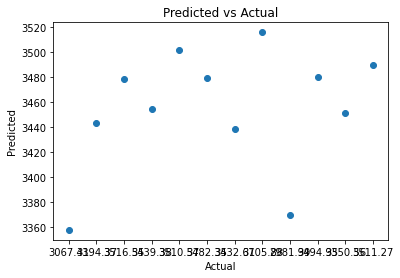

In [ ]:
# draw graph between predicted values and actual values

plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual')    
plt.xlabel('Actual')    
plt.ylabel('Predicted') 
plt.show()  
# plot graph showing predicted price and actual price over time


TypeError: 'value' must be an instance of str or bytes, not a int

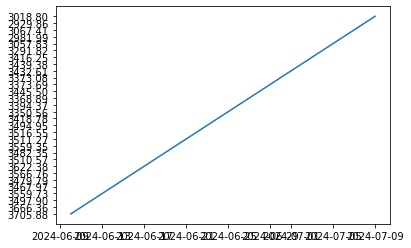

In [ ]:
plt.plot(data['date'], data['price'], label='Actual Price')
plt.plot(data['date'], data['shifted_price'], label='Predicted Price')
plt.legend()
plt.show()